In [195]:
import xlwings as xw
from xlwings import constants
import pandas as pd
import random
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt

lets connect the excel document

In [196]:
book=xw.Book("xiaomi PYTHON.xlsm")
book.sheets
assumptions_sht = book.sheets("Python simulation")
simu_sht=book.sheets("Python output")

# 1) Initialize parameters 

In [197]:
num_sim = 1000

#  growth  (smartphone) 
g1_low=assumptions_sht.range('l9').value
g1_mid=assumptions_sht.range('m9').value
g1_high=assumptions_sht.range('n9').value
#  growth  (TV)
g2_low = assumptions_sht.range('l10').value
g2_mid = assumptions_sht.range('m10').value
g2_high = assumptions_sht.range('n10').value
#  growth   (Internet)
g3_low = assumptions_sht.range('l11').value
g3_mid = assumptions_sht.range('m11').value
g3_high = assumptions_sht.range('n11').value

#  growth  (others)
g4_low = assumptions_sht.range('l12').value
g4_mid = assumptions_sht.range('m12').value
g4_high = assumptions_sht.range('n12').value

#cost 1
c1_low=assumptions_sht.range('l15').value
c1_mid=assumptions_sht.range('m15').value
c1_high=assumptions_sht.range('n15').value
#cost2
c2_low = assumptions_sht.range('l16').value
c2_mid=assumptions_sht.range('m16').value
c2_high=assumptions_sht.range('n16').value

#cost3
c3_low = assumptions_sht.range('l17').value
c3_mid=assumptions_sht.range('m17').value
c3_high=assumptions_sht.range('n17').value

#cost4
c4_low = assumptions_sht.range('l18').value
c4_mid=assumptions_sht.range('m18').value
c4_high=assumptions_sht.range('n18').value

#SG&A
sga_low = assumptions_sht.range('l20').value
sga_high = assumptions_sht.range('n20').value

#R&D
rd_low = assumptions_sht.range('l21').value
rd_high = assumptions_sht.range('n21').value

#beta unlevered
betaun_mean=assumptions_sht.range('J24').value
betaun_std=assumptions_sht.range('K24').value

#RONIC
roic_mean = assumptions_sht.range('J25').value
roic_std = assumptions_sht.range('K25').value

#perpet growth
pg_mean =assumptions_sht.range('J26').value
pg_std = assumptions_sht.range('K26').value

#ev/ebitda
ev_ebitda_low = assumptions_sht.range('l27').value
ev_ebitda_mid = assumptions_sht.range('m27').value
ev_ebitda_high = assumptions_sht.range('n27').value

#ev/sales
ev_sales_low = assumptions_sht.range('l28').value
ev_sales_mid = assumptions_sht.range('m28').value
ev_sales_high = assumptions_sht.range('n28').value

#equity market premium
emp_mean =assumptions_sht.range('J29').value
emp_std = assumptions_sht.range('K29').value



# 2) define law of distribution for each variable

In [198]:
def dcf_function (num_sim, g1_low, g1_mid,g1_high, g2_low, g2_mid,g2_high,g3_low, g3_mid,g3_high,g4_low, g4_mid,g4_high,
                  c1_low,c1_mid,c1_high,c2_low,c2_mid,c2_high,c3_low,c3_mid,c3_high,c4_low,c4_mid,c4_high,sga_low,sga_high,
                  rd_low,rd_high,betaun_mean,betaun_std,roic_mean,roic_std,pg_mean,pg_std,ev_ebitda_low,ev_ebitda_mid,
                  ev_ebitda_high,ev_sales_low,ev_sales_mid,ev_sales_high,emp_mean,emp_std):
    simu_sht.clear()
    outcome = []
        
    for i in range (num_sim) :
        # a) growth rate (triangular distribution)
        g1_rate = np.random.triangular(g1_low,g1_mid,g1_high)
        assumptions_sht.range('D9').value = g1_rate
        g2_rate = np.random.triangular(g2_low,g2_mid,g2_high)
        assumptions_sht.range('D10').value = g2_rate
        g3_rate = np.random.triangular(g3_low,g3_mid,g3_high)
        assumptions_sht.range('D11').value = g3_rate
        g4_rate = np.random.triangular(g4_low,g4_mid,g4_high)
        assumptions_sht.range('D12').value = g4_rate
        
        #b) costs (triangular distribution)
        c1_rate = np.random.triangular(c1_low,c1_mid,c1_high)
        assumptions_sht.range('d15').value= c1_rate
        c2_rate = np.random.triangular(c2_low,c2_mid,c2_high)
        assumptions_sht.range('d16').value= c2_rate
        c3_rate = np.random.triangular(c3_low,c3_mid,c3_high)
        assumptions_sht.range('d17').value= c3_rate
        c4_rate = np.random.triangular(c4_low,c4_mid,c4_high)
        assumptions_sht.range('d18').value= c4_rate
        
        #uniform ditribution
        sga_rate=np.random.uniform(sga_low,sga_high)
        assumptions_sht.range('d20').value=sga_rate
        rd_rate=np.random.uniform(rd_low,rd_high)
        assumptions_sht.range('d21').value=rd_rate
        
        #c) valuation assumptions unlevered beta, roic, perpetual , ev/ebitda....
        betaun_rate=random.normalvariate(betaun_mean,betaun_std)
        assumptions_sht.range('d24').value= betaun_rate
        roic_rate=random.normalvariate(roic_mean,roic_std)
        assumptions_sht.range('d25').value=roic_rate
        pg_rate=random.normalvariate(pg_mean,pg_std)
        assumptions_sht.range('d26').value=pg_rate
        ev_ebitda_rate=np.random.triangular(ev_ebitda_low,ev_ebitda_mid,ev_ebitda_high)
        assumptions_sht.range('d27').value=ev_ebitda_rate
        ev_sales_rate=np.random.triangular(ev_sales_low,ev_sales_mid,ev_sales_high)
        assumptions_sht.range('d28').value=ev_sales_rate
        emp_rate=random.normalvariate(emp_mean,emp_std)
        assumptions_sht.range('d29').value= emp_rate
        
        #d) value per share
        price=assumptions_sht.range('d2').value
        price=float(price)

        outcome.append((g1_rate,g2_rate,g3_rate,g4_rate,c1_rate,c2_rate,c3_rate,c4_rate,sga_rate,rd_rate,betaun_rate,
                        roic_rate,pg_rate,ev_ebitda_rate,ev_sales_rate,emp_rate,price))
        df = pd.DataFrame(outcome, columns = ['Smartphone growth', 'TV growth', 'Internet Services growth', 'Others growth',
                                              'cost smartphone','cost TV','cost internet services','cost others', 'SG&A cost',
                                              'R&D cost','beta unlevered','RONIC','Perpetual growth TV','EV/EBITDA','EV/Sales',
                                              'Equity market premium','Value per share'])
    return df


# 3) running the function

In [199]:
df = dcf_function (num_sim, g1_low, g1_mid,g1_high, g2_low, g2_mid,g2_high,g3_low, g3_mid,g3_high,g4_low, g4_mid,g4_high,
                  c1_low,c1_mid,c1_high,c2_low,c2_mid,c2_high,c3_low,c3_mid,c3_high,c4_low,c4_mid,c4_high,sga_low,sga_high,
                  rd_low,rd_high,betaun_mean,betaun_std,roic_mean,roic_std,pg_mean,pg_std,ev_ebitda_low,ev_ebitda_mid,
                  ev_ebitda_high,ev_sales_low,ev_sales_mid,ev_sales_high,emp_mean,emp_std)

In [200]:
# Append all the values in simu_sht in our excel.
simu_sht.range('A1').options(pd.DataFrame, index = False).value = df

# 4) generate graphes

#### Giving names to output

In [201]:
#growth 
g1_column = df['Smartphone growth']
g2_column = df['TV growth']
g3_column = df['Internet Services growth']
g4_column = df['Others growth']
#costs
c1_column = df['cost smartphone']
c2_column = df['cost TV']
c3_column = df['cost internet services']
c4_column = df['cost others']
sga_column = df['SG&A cost']
rd_column = df['R&D cost']
#valuation assumptions
betaun_column = df['beta unlevered']
roic_column = df['RONIC']
pg_column = df['Perpetual growth TV']
ev_ebitda_column = df['EV/EBITDA']
ev_sales_column = df['EV/Sales']
emp_column = df['Equity market premium']
price_column = df['Value per share']

# plot style
plt.style.use('default')

#### plotting the outcome

<Picture 'graph18' in <Sheet [Xiaomi PYTHON.xlsm]Python output>>

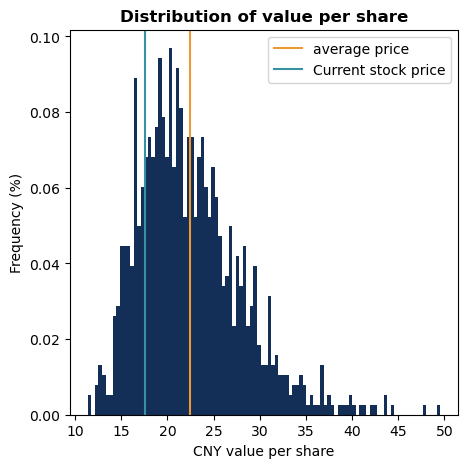

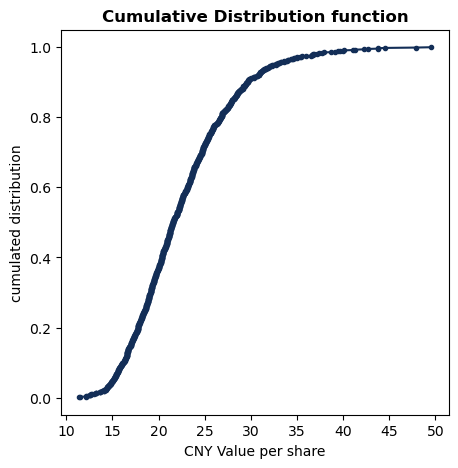

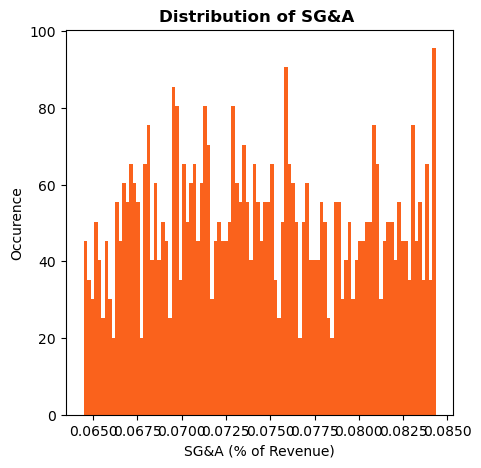

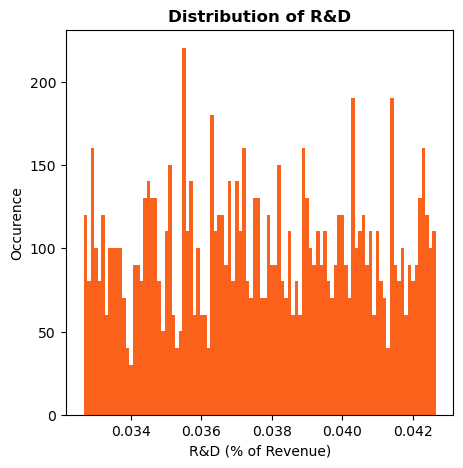

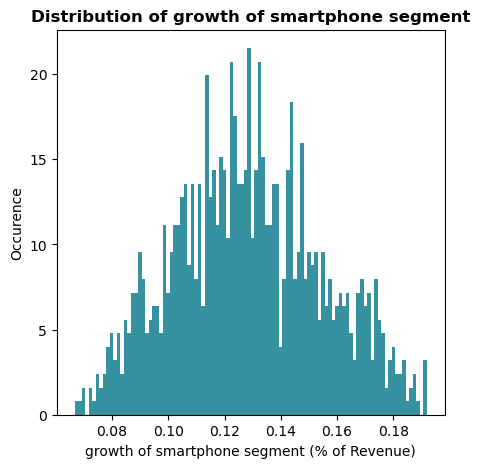

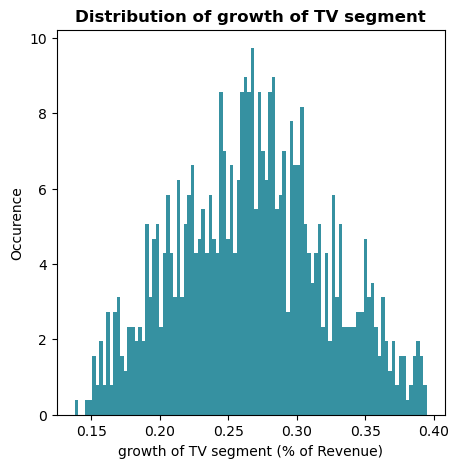

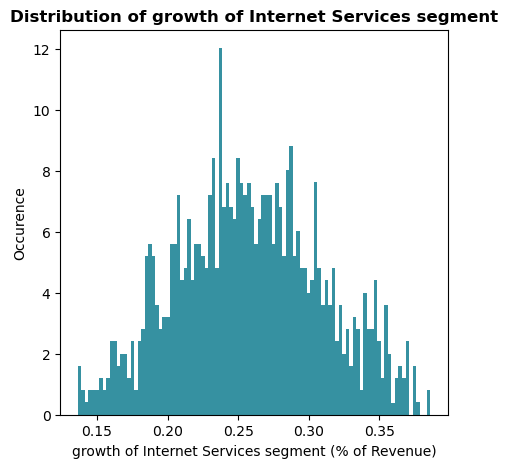

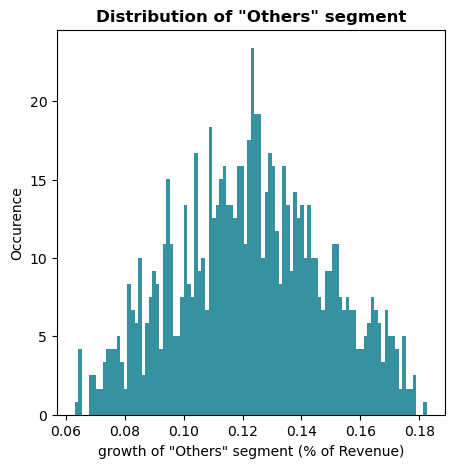

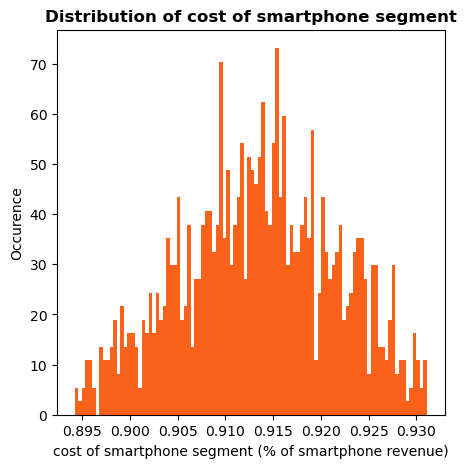

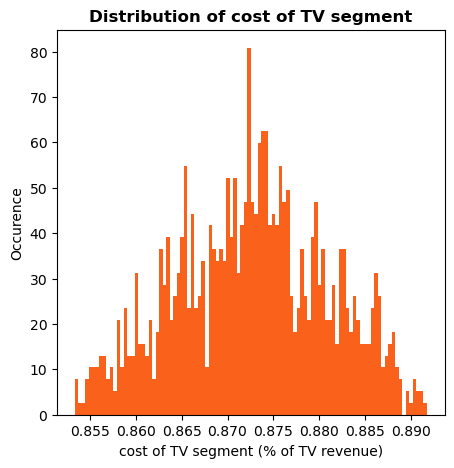

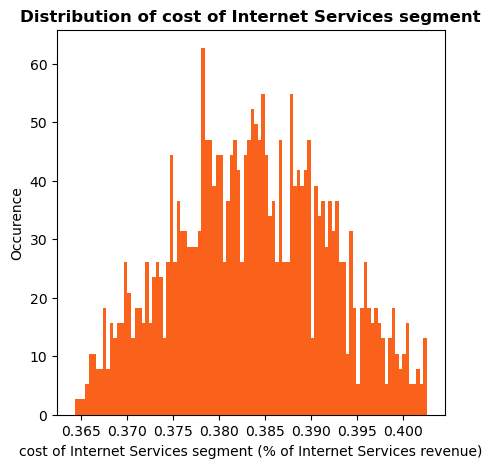

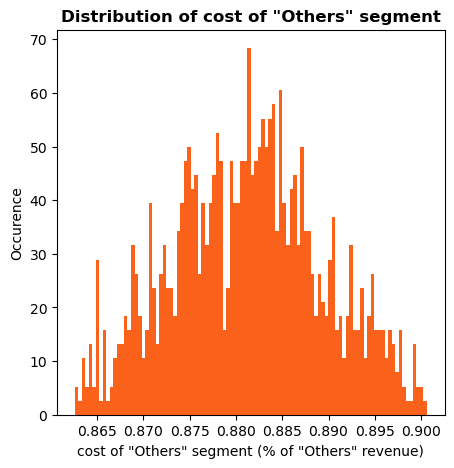

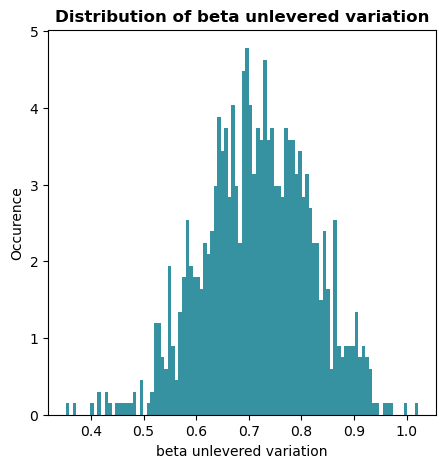

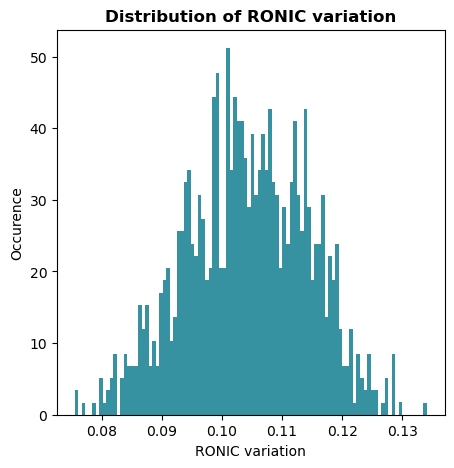

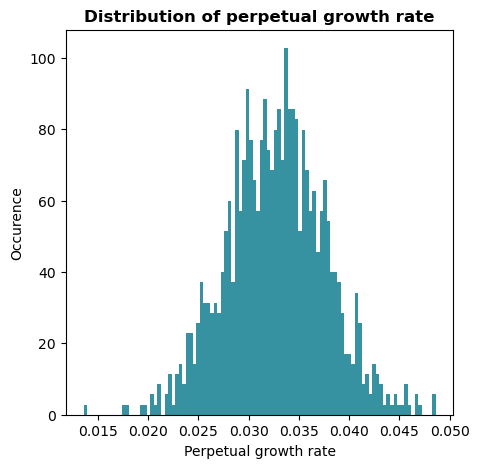

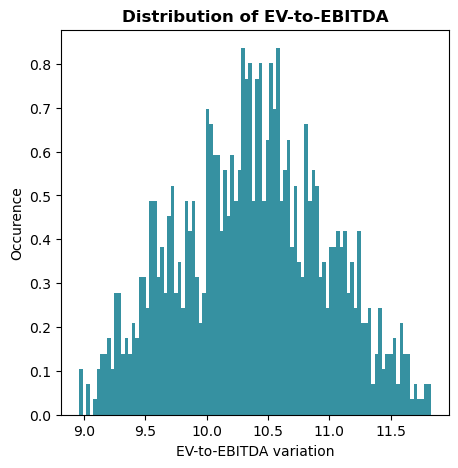

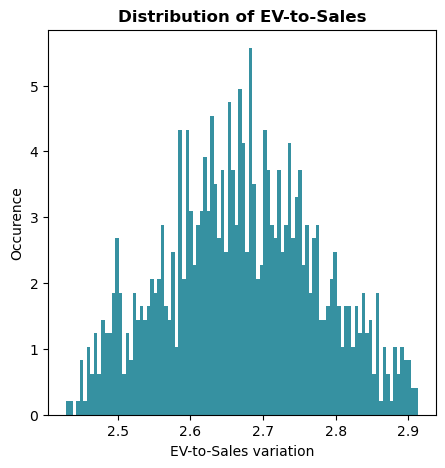

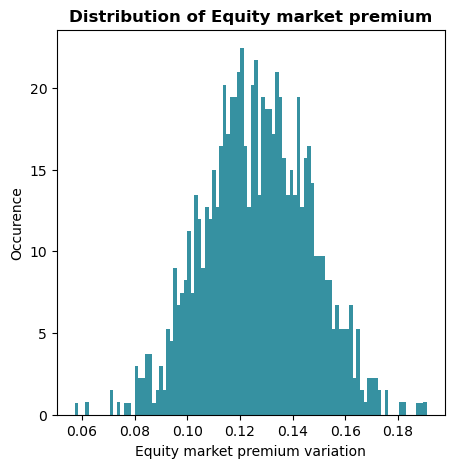

In [202]:
a=int(num_sim*0.10)

# histogram of value per share
graph1 =plt.figure(figsize=(5,5))
ax = graph1.add_subplot(1, 1, 1)
graph1.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(price_column, density = True,bins = a,color='#132e57')
plt.ylabel('Frequency (%)')
plt.xlabel('CNY value per share')
plt.title('Distribution of value per share', fontsize = 12,fontweight='bold')
plt.axvline(price_column.mean(), label ='average price', color= '#ee9835')
plt.axvline(assumptions_sht.range('g2').value, label ='Current stock price', color= '#3691a1')

plt.legend()
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r1")
simu_sht.pictures.add(graph1, name = 'graph1', update = True,top = rng.top,left = rng.left)

# creation of cumulative distribution function
graph2 =plt.figure(figsize=(5,5))
ax = graph2.add_subplot(1, 1, 1)
graph2.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
x=np.sort(price_column)
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y, marker = '.', color='#132e57')
plt.xlabel("CNY Value per share")
plt.ylabel ('cumulated distribution')
plt.title ('Cumulative Distribution function', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z1")
simu_sht.pictures.add(graph2, name = 'graph2', update = True,top = rng.top,left = rng.left)

# SG&A
graph3 =plt.figure(figsize=(5,5))
ax = graph3.add_subplot(1, 1, 1)
graph3.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(sga_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('SG&A (% of Revenue)')
plt.title('Distribution of SG&A ', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r25")
simu_sht.pictures.add(graph3, name = 'graph3', update = True,top = rng.top,left = rng.left)

# R&D
graph4 =plt.figure(figsize=(5,5))
ax = graph4.add_subplot(1, 1, 1)
graph4.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(rd_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('R&D (% of Revenue)')
plt.title('Distribution of R&D',fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z25")
simu_sht.pictures.add(graph4, name = 'graph4', update = True,top = rng.top,left = rng.left)

#  growth rates
graph5 =plt.figure(figsize=(5,5))
ax = graph5.add_subplot(1, 1, 1)
graph5.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(g1_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('growth of smartphone segment (% of Revenue)')
plt.title('Distribution of growth of smartphone segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r50")
simu_sht.pictures.add(graph5, name = 'graph5', update = True,top = rng.top,left = rng.left)

graph6 =plt.figure(figsize=(5,5))
ax = graph6.add_subplot(1, 1, 1)
graph6.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(g2_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('growth of TV segment (% of Revenue)')
plt.title('Distribution of growth of TV segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z50")
simu_sht.pictures.add(graph6, name = 'graph6', update = True,top = rng.top,left = rng.left)

graph7 =plt.figure(figsize=(5,5))
ax = graph7.add_subplot(1, 1, 1)
graph7.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(g3_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('growth of Internet Services segment (% of Revenue)')
plt.title('Distribution of growth of Internet Services segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r75")
simu_sht.pictures.add(graph7, name = 'graph7', update = True,top = rng.top,left = rng.left)

graph8 =plt.figure(figsize=(5,5))
ax = graph8.add_subplot(1, 1, 1)
graph8.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(g4_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('growth of "Others" segment (% of Revenue)')
plt.title('Distribution of "Others" segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z75")
simu_sht.pictures.add(graph8, name = 'graph8', update = True,top = rng.top,left = rng.left)



# costs
graph9 =plt.figure(figsize=(5,5))
ax = graph9.add_subplot(1, 1, 1)
graph9.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(c1_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('cost of smartphone segment (% of smartphone revenue)')
plt.title('Distribution of cost of smartphone segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r100")
simu_sht.pictures.add(graph9, name = 'graph9', update = True,top = rng.top,left = rng.left)

graph10 =plt.figure(figsize=(5,5))
ax = graph10.add_subplot(1, 1, 1)
graph10.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(c2_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('cost of TV segment (% of TV revenue)')
plt.title('Distribution of cost of TV segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z100")
simu_sht.pictures.add(graph10, name = 'graph10', update = True,top = rng.top,left = rng.left)

graph11 =plt.figure(figsize=(5,5))
ax = graph11.add_subplot(1, 1, 1)
graph11.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(c3_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('cost of Internet Services segment (% of Internet Services revenue)')
plt.title('Distribution of cost of Internet Services segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r125")
simu_sht.pictures.add(graph11, name = 'graph11', update = True,top = rng.top,left = rng.left)

graph12 =plt.figure(figsize=(5,5))
ax = graph12.add_subplot(1, 1, 1)
graph12.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(c4_column, density = True,bins = a, color = '#fa621c')
plt.ylabel('Occurence')
plt.xlabel('cost of "Others" segment (% of "Others" revenue)')
plt.title('Distribution of cost of "Others" segment', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z125")
simu_sht.pictures.add(graph12, name = 'graph12', update = True,top = rng.top,left = rng.left)

# valuation assumptions
graph13 =plt.figure(figsize=(5,5))
ax = graph13.add_subplot(1, 1, 1)
graph13.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(betaun_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('beta unlevered variation')
plt.title('Distribution of beta unlevered variation', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r150")
simu_sht.pictures.add(graph13, name = 'graph13', update = True,top = rng.top,left = rng.left)

graph14 =plt.figure(figsize=(5,5))
ax = graph14.add_subplot(1, 1, 1)
graph14.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(roic_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('RONIC variation')
plt.title('Distribution of RONIC variation',fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z150")
simu_sht.pictures.add(graph14, name = 'graph14', update = True,top = rng.top,left = rng.left)

graph15 =plt.figure(figsize=(5,5))
ax = graph15.add_subplot(1, 1, 1)
graph15.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(pg_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('Perpetual growth rate')
plt.title('Distribution of perpetual growth rate', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r175")
simu_sht.pictures.add(graph15, name = 'graph15', update = True,top = rng.top,left = rng.left)

graph16 =plt.figure(figsize=(5,5))
ax = graph16.add_subplot(1, 1, 1)
graph16.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(ev_ebitda_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('EV-to-EBITDA variation')
plt.title('Distribution of EV-to-EBITDA', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z175")
simu_sht.pictures.add(graph16, name = 'graph16', update = True,top = rng.top,left = rng.left)

graph17 =plt.figure(figsize=(5,5))
ax = graph17.add_subplot(1, 1, 1)
graph17.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(ev_sales_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('EV-to-Sales variation')
plt.title('Distribution of EV-to-Sales',fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("r200")
simu_sht.pictures.add(graph17, name = 'graph17', update = True,top = rng.top,left = rng.left)

graph18 =plt.figure(figsize=(5,5))
ax = graph18.add_subplot(1, 1, 1)
graph18.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.hist(emp_column, density = True,bins = a, color = '#3691a1')
plt.ylabel('Occurence')
plt.xlabel('Equity market premium variation')
plt.title('Distribution of Equity market premium', fontsize = 12,fontweight='bold')
plt.grid(visible='none',axis='y',color='none')
plt.grid(visible='none',axis='x',color='none')
rng = simu_sht.range("Z200")
simu_sht.pictures.add(graph18, name = 'graph18', update = True,top = rng.top,left = rng.left)



#### details on some key statistics

In [203]:
desc_stat=df.describe()
simu_sht.range('R224').value = desc_stat

#### Correlation between each variable and Value per share

<Picture 'corr16' in <Sheet [Xiaomi PYTHON.xlsm]Python output>>

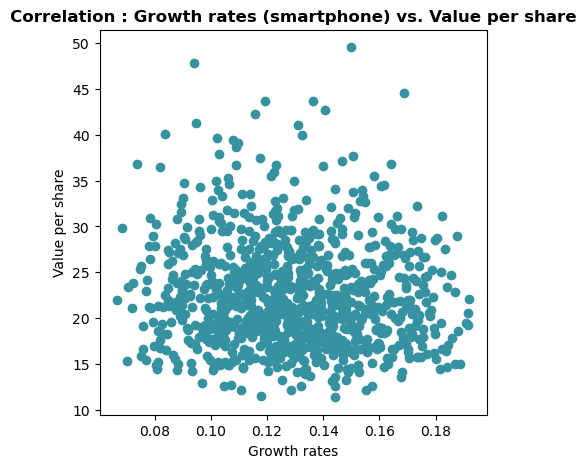

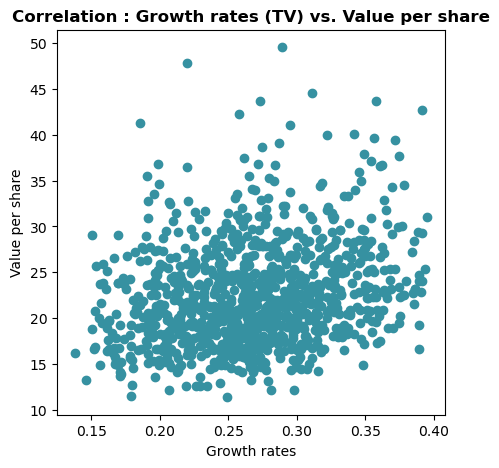

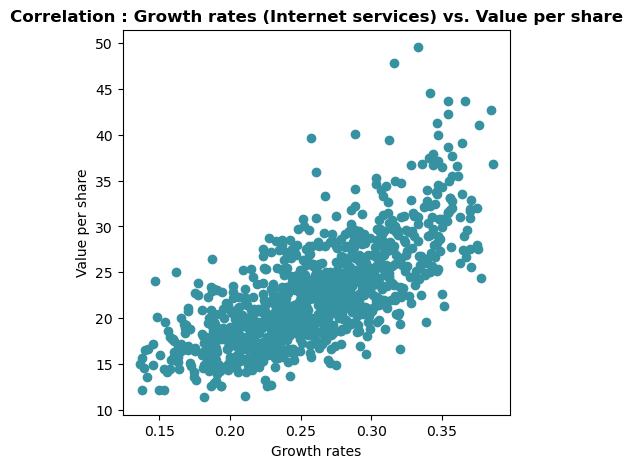

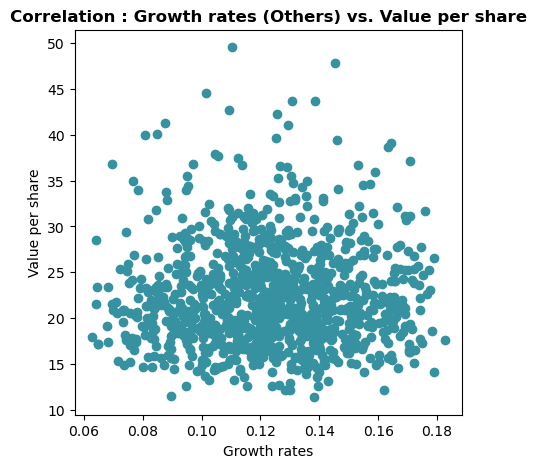

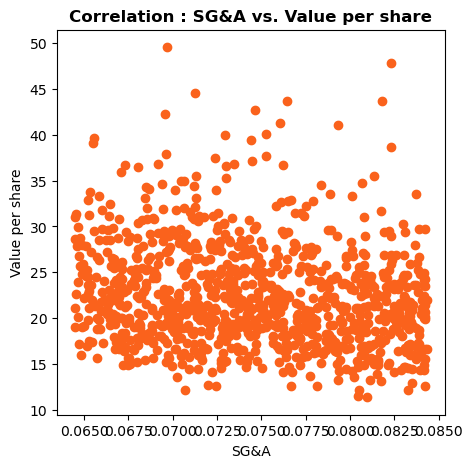

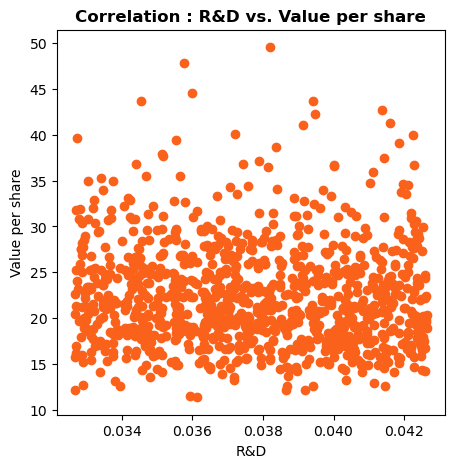

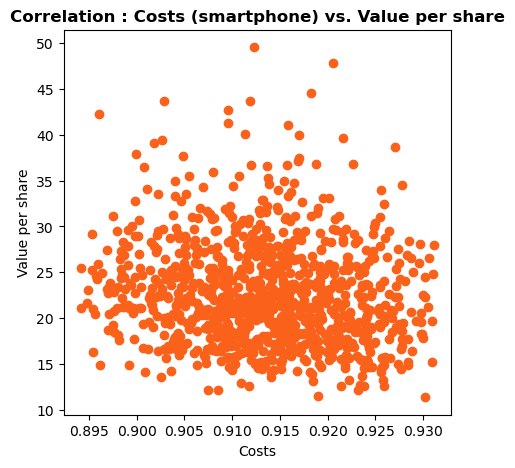

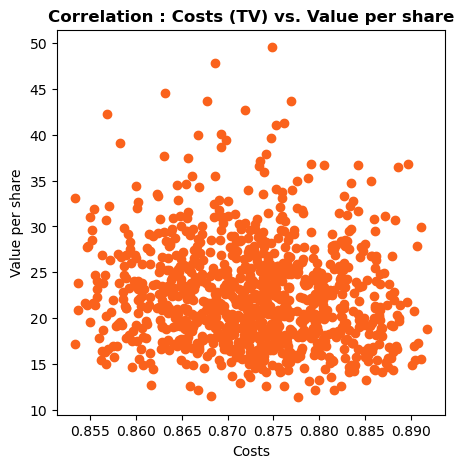

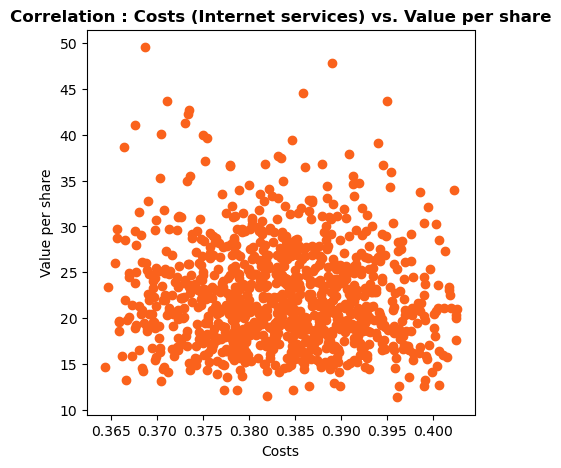

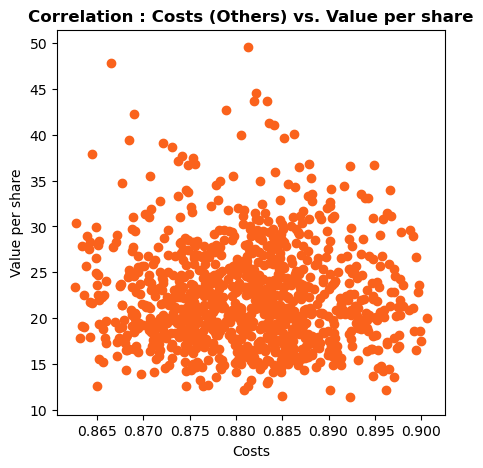

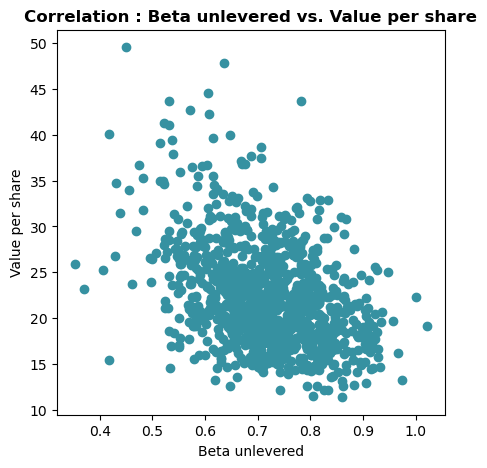

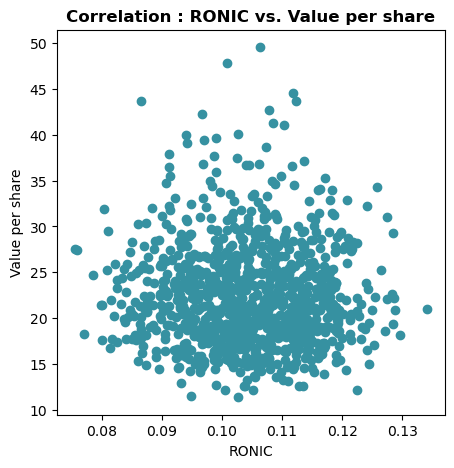

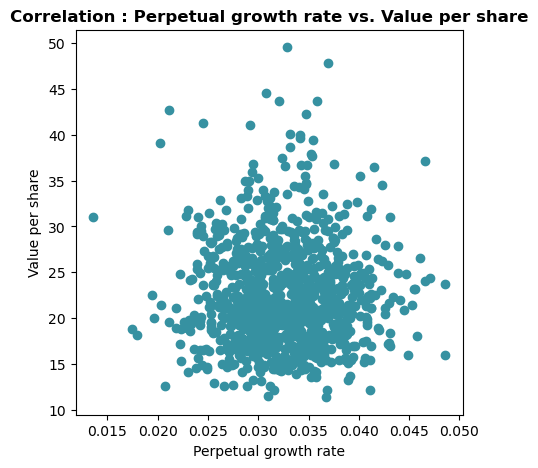

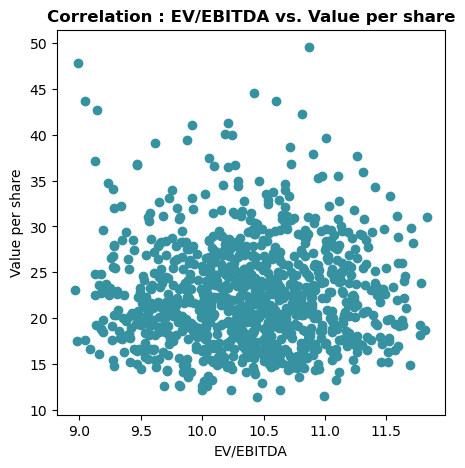

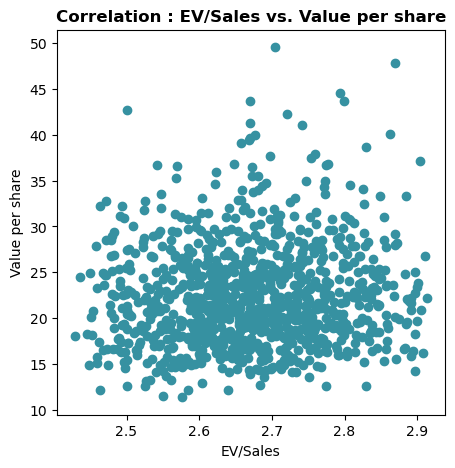

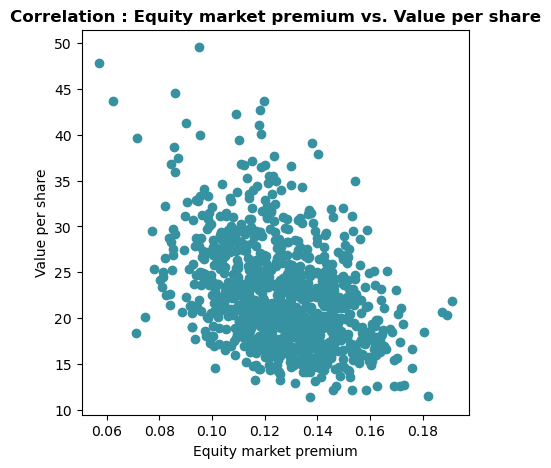

In [204]:
corr1 =plt.figure(figsize=(5,5))
ax = corr1.add_subplot(1, 1, 1)
corr1.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(g1_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Growth rates')
plt.title('Correlation : Growth rates (smartphone) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al1") 
simu_sht.pictures.add(corr1, name = 'corr1', update = True,top = rng.top,left = rng.left)

corr2 =plt.figure(figsize=(5,5))
ax = corr2.add_subplot(1, 1, 1)
corr2.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(g2_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Growth rates')
plt.title('Correlation : Growth rates (TV) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at1") 
simu_sht.pictures.add(corr2, name = 'corr2', update = True,top = rng.top,left = rng.left)

corr3 =plt.figure(figsize=(5,5))
ax = corr3.add_subplot(1, 1, 1)
corr3.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(g3_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Growth rates')
plt.title('Correlation : Growth rates (Internet services) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al25") 
simu_sht.pictures.add(corr3, name = 'corr3', update = True,top = rng.top,left = rng.left)

corr4 =plt.figure(figsize=(5,5))
ax = corr4.add_subplot(1, 1, 1)
corr4.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(g4_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Growth rates')
plt.title('Correlation : Growth rates (Others) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at25") 
simu_sht.pictures.add(corr4, name = 'corr4', update = True,top = rng.top,left = rng.left)

corr5 =plt.figure(figsize=(5,5))
ax = corr5.add_subplot(1, 1, 1)
corr5.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(sga_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('SG&A')
plt.title('Correlation : SG&A vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al50") 
simu_sht.pictures.add(corr5, name = 'corr5', update = True,top = rng.top,left = rng.left)

corr6 =plt.figure(figsize=(5,5))
ax = corr6.add_subplot(1, 1, 1)
corr6.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(rd_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('R&D')
plt.title('Correlation : R&D vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("AT50")
simu_sht.pictures.add(corr6, name = 'corr6', update = True,top = rng.top,left = rng.left)

corr7 =plt.figure(figsize=(5,5))
ax = corr7.add_subplot(1, 1, 1)
corr7.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(c1_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('Costs')
plt.title('Correlation : Costs (smartphone) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al75")
simu_sht.pictures.add(corr7, name = 'corr7', update = True,top = rng.top,left = rng.left)

corr8 =plt.figure(figsize=(5,5))
ax = corr8.add_subplot(1, 1, 1)
corr8.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(c2_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('Costs')
plt.title('Correlation : Costs (TV) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at75")
simu_sht.pictures.add(corr8, name = 'corr8', update = True,top = rng.top,left = rng.left)

corr9 =plt.figure(figsize=(5,5))
ax = corr9.add_subplot(1, 1, 1)
corr9.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(c3_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('Costs')
plt.title('Correlation : Costs (Internet services) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al100")
simu_sht.pictures.add(corr9, name = 'corr9', update = True,top = rng.top,left = rng.left)

corr10 =plt.figure(figsize=(5,5))
ax = corr10.add_subplot(1, 1, 1)
corr10.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(c4_column,price_column,color='#fa621c')
plt.ylabel('Value per share')
plt.xlabel('Costs')
plt.title('Correlation : Costs (Others) vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at100") 
simu_sht.pictures.add(corr10, name = 'corr10', update = True,top = rng.top,left = rng.left)

corr11 =plt.figure(figsize=(5,5))
ax = corr11.add_subplot(1, 1, 1)
corr11.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(betaun_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Beta unlevered')
plt.title('Correlation : Beta unlevered vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al125")
simu_sht.pictures.add(corr11, name = 'corr11', update = True,top = rng.top,left = rng.left)

corr12 =plt.figure(figsize=(5,5))
ax = corr12.add_subplot(1, 1, 1)
corr12.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(roic_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('RONIC')
plt.title('Correlation : RONIC vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at125") 
simu_sht.pictures.add(corr12, name = 'corr12', update = True,top = rng.top,left = rng.left)


corr13 =plt.figure(figsize=(5,5))
ax = corr13.add_subplot(1, 1, 1)
corr13.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(pg_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Perpetual growth rate')
plt.title('Correlation : Perpetual growth rate vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al150") 
simu_sht.pictures.add(corr13, name = 'corr13', update = True,top = rng.top,left = rng.left)

corr14 =plt.figure(figsize=(5,5))
ax = corr14.add_subplot(1, 1, 1)
corr14.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(ev_ebitda_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('EV/EBITDA')
plt.title('Correlation : EV/EBITDA vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at150") 
simu_sht.pictures.add(corr14, name = 'corr14', update = True,top = rng.top,left = rng.left)

corr15 =plt.figure(figsize=(5,5))
ax = corr15.add_subplot(1, 1, 1)
corr15.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(ev_sales_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('EV/Sales')
plt.title('Correlation : EV/Sales vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("al175")
simu_sht.pictures.add(corr15, name = 'corr15', update = True,top = rng.top,left = rng.left)

corr16 =plt.figure(figsize=(5,5))
ax = corr16.add_subplot(1, 1, 1)
corr16.patch.set_facecolor('none')
ax.patch.set_facecolor('none')
plt.scatter(emp_column,price_column,color = '#3691a1')
plt.ylabel('Value per share')
plt.xlabel('Equity market premium')
plt.title('Correlation : Equity market premium vs. Value per share', fontsize = 12,fontweight='bold')
rng = simu_sht.range("at175") 
simu_sht.pictures.add(corr16, name = 'corr16', update = True,top = rng.top,left = rng.left)
